In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import time
import datetime

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/pavel.fedorov/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Подход 1: градиентный бустинг "в лоб"

In [2]:
features = pd.read_csv('./features.csv', index_col='match_id')

features.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

In [9]:
rows = len(features)

counts = features.describe().T['count']
na = counts[counts < rows]
na.apply(lambda l: 1 - l/rows).sort_values()

dire_courier_time              0.006953
radiant_courier_time           0.007117
dire_first_ward_time           0.018780
radiant_first_ward_time        0.018883
radiant_bottle_time            0.161380
dire_bottle_time               0.166029
first_blood_time               0.201100
first_blood_team               0.201100
first_blood_player1            0.201100
dire_flying_courier_time       0.268415
radiant_flying_courier_time    0.282619
first_blood_player2            0.452402
Name: count, dtype: float64

In [10]:
features = features.fillna(0)

In [15]:
X_train = features
y_train = features['radiant_win'].values.ravel()
del features['radiant_win']

In [16]:
cv = KFold(n_splits = 5, shuffle=True)

In [17]:
scores = []
tree_numbers = [10, 20, 30, 40, 50]
for k in tree_numbers:
    model = GradientBoostingClassifier(n_estimators=k)
    
    start_time = datetime.datetime.now()
    current_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    print ('Tree number:' + str(k) + ' Time elapsed:      ' + str(datetime.datetime.now() - start_time))
    scores.append(np.mean(current_scores))

Tree number:10 Time elapsed:      0:00:30.067471
Tree number:20 Time elapsed:      0:00:58.212770
Tree number:30 Time elapsed:      0:01:22.344176


KeyboardInterrupt: 

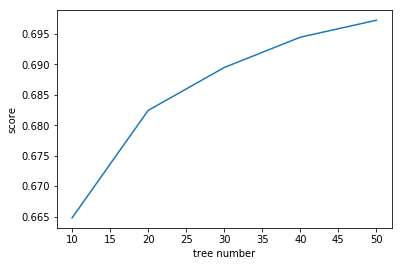

In [64]:
plt.plot(tree_numbers, scores)
plt.xlabel('tree number')
plt.ylabel('score')
plt.show()

In [65]:
scores[2]

0.6894703037774905

# Подход 2: логистическая регрессия

In [31]:
cv = KFold(n_splits = 5, shuffle=True)

X_train = StandardScaler().fit_transform(X_train)

In [ ]:
scores = []
pows = range(-3, 5)
c_values = [10.0 ** i for i in pows]
for c in c_values:
    start_time = datetime.datetime.now()
    model = LogisticRegression(C=c, random_state=42)
    current_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print ('c :' + str(c) + ' Time elapsed:      ' + str(datetime.datetime.now() - start_time), current_scores)
    scores.append(np.mean(current_scores))

c :0.001 Time elapsed:      0:00:16.689190 [0.75417972 0.75459966 0.7500819  0.74753776 0.75165715]
c :0.01 Time elapsed:      0:00:22.281583 [0.75325652 0.74844667 0.75755264 0.75083616 0.74950193]
c :0.1 Time elapsed:      0:00:24.765968 [0.75421258 0.75025096 0.75325818 0.74813839 0.75381699]
c :1.0 Time elapsed:      0:00:25.729267 [0.75162164 0.74985639 0.75394026 0.75502266 0.74761865]


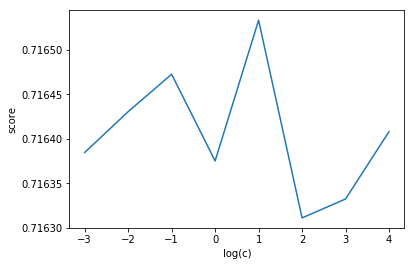

Scores: [0.7163846320341405, 0.7164304175536932, 0.7164723602251755, 0.71637515729087, 0.7165328931824468, 0.7163113086456058, 0.716332537564233, 0.7164080836571249] max: 0.7165328931824468
Best C is  10.0


In [68]:
plt.plot(pows, scores)
plt.xlabel('log(c)')
plt.ylabel('score')
plt.show()
max_score = max(scores)
print('Scores:', scores , 'max:', max_score)
print('Best C is ', c_values[scores.index(max_score)])

In [20]:
features.drop(['lobby_type',
    'r1_hero',
    'r2_hero',
    'r3_hero',
    'r4_hero',
    'r5_hero',
    'd1_hero',
    'd2_hero',
    'd3_hero',
    'd4_hero',
    'd5_hero'],axis = 1, inplace = True)

X_train = StandardScaler().fit_transform(features)

scores = []
for c in c_values:
    start_time = datetime.datetime.now()
    model = LogisticRegression(C=c, random_state=42)
    current_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print ('c :' + str(c) + ' Time elapsed:      ' + str(datetime.datetime.now() - start_time), current_scores)
    scores.append(np.mean(current_scores))

c :0.001 Time elapsed:      0:00:09.434330 [0.72420701 0.71192825 0.71741849 0.71091337 0.71671245]
c :0.01 Time elapsed:      0:00:11.589034 [0.72083955 0.72102496 0.71590166 0.71206349 0.71190456]
c :0.1 Time elapsed:      0:00:12.521736 [0.71712034 0.71607353 0.72021752 0.71198994 0.71689672]
c :1.0 Time elapsed:      0:00:12.358647 [0.71364532 0.71828416 0.71655686 0.71461837 0.71931485]
c :10.0 Time elapsed:      0:00:11.774243 [0.71206003 0.72048999 0.71635377 0.71321407 0.72054505]
c :100.0 Time elapsed:      0:00:12.211678 [0.71959921 0.7207469  0.71866842 0.71201663 0.71160889]
c :1000.0 Time elapsed:      0:00:11.335206 [0.71761963 0.71500469 0.71403878 0.71485009 0.71976201]
c :10000.0 Time elapsed:      0:00:12.241630 [0.71919433 0.70742505 0.71734217 0.72393469 0.71536532]


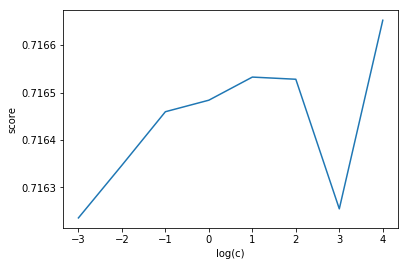

Scores: [0.7162359165612457, 0.716346842963549, 0.7164596094612888, 0.7164839106331115, 0.7165325819134797, 0.7165280088031721, 0.7162550412010601, 0.7166523134740743] max: 0.7166523134740743
Best C is  10000.0


In [21]:
plt.plot(pows, scores)
plt.xlabel('log(c)')
plt.ylabel('score')
plt.show()
max_score = max(scores)
print('Scores:', scores , 'max:', max_score)
print('Best C is ', c_values[scores.index(max_score)])

In [23]:
heroes = pd.read_csv('./features.csv', index_col='match_id')

heroes.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)
heroes = heroes.fillna(0)

l = ['r' + str(i) + '_hero' for i in range(1,6)]
l += ['d' + str(i) + '_hero' for i in range(1,6)]
len(np.unique(heroes[l].values))


108

In [24]:
features = pd.read_csv('./features.csv', index_col='match_id')

features.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

features = features.fillna(0)
del features['radiant_win']

X_pick = np.zeros((features.shape[0], 112))

for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
l += ['lobby_type']
features.drop(l,axis = 1, inplace = True)

X_train = np.hstack((features.values, X_pick))

X_train = StandardScaler().fit_transform(X_train)

In [73]:
scores = []
for c in c_values:
    start_time = datetime.datetime.now()
    model = LogisticRegression(C=c, random_state=42)
    current_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print ('c :' + str(c) + ' Time elapsed:      ' + str(datetime.datetime.now() - start_time), current_scores)
    scores.append(np.mean(current_scores))

c :0.001 Time elapsed:      0:00:15.268899 [0.75066749 0.75446907 0.75186921 0.75328392 0.74870705]
c :0.01 Time elapsed:      0:00:20.880925 [0.75460467 0.7563389  0.74283229 0.75696486 0.74815412]
c :0.1 Time elapsed:      0:00:22.426084 [0.75103822 0.74831164 0.75145866 0.75227271 0.75601417]
c :1.0 Time elapsed:      0:00:24.447592 [0.75773992 0.75024109 0.746453   0.75153402 0.75302784]
c :10.0 Time elapsed:      0:00:22.572278 [0.75202616 0.75084395 0.75624092 0.75294311 0.74585489]
c :100.0 Time elapsed:      0:00:22.690311 [0.75647142 0.75336675 0.74447303 0.75465195 0.75025072]
c :1000.0 Time elapsed:      0:00:21.800370 [0.7517942  0.75149462 0.75667674 0.74984171 0.74840655]
c :10000.0 Time elapsed:      0:00:22.671136 [0.74792492 0.75487542 0.7505294  0.75532817 0.7500739 ]


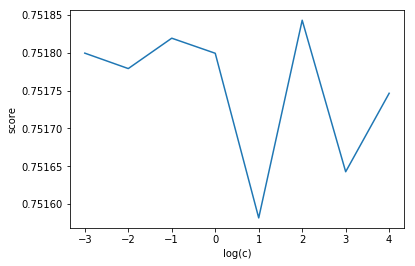

Scores: [0.7517993469864876, 0.7517789695635642, 0.751819077795546, 0.751799174677137, 0.7515818077353458, 0.7518427766219702, 0.7516427644203574, 0.7517463626753396] max: 0.7518427766219702
Best C is  100.0


In [74]:
plt.plot(pows, scores)
plt.xlabel('log(c)')
plt.ylabel('score')
plt.show()
max_score = max(scores)
print('Scores:', scores , 'max:', max_score)
print('Best C is ', c_values[scores.index(max_score)])

In [25]:
data = pd.read_csv('./features_test.csv',index_col='match_id')
data.fillna(0,inplace = True)


X_pick = np.zeros((data.shape[0], 112))

for i, match_id in enumerate(data.index):
    for p in range(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
data.drop([
    'lobby_type',
    'r1_hero',
    'r2_hero',
    'r3_hero',
    'r4_hero',
    'r5_hero',
    'd1_hero',
    'd2_hero',
    'd3_hero',
    'd4_hero',
    'd5_hero',
],axis = 1, inplace = True)

X_test = np.hstack((data.values, X_pick))
X_test = StandardScaler().fit_transform(X_test)

In [26]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
scores = model.predict_proba(X_test)
scores = [scores[i][1] for i in range(len(scores))]

print('max:', max(scores))
print('min:', min(scores))

max: 0.9964712543350225
min: 0.008688602958864705


In [28]:
scores

[0.8247566116990132,
 0.7582594626017083,
 0.1871601092426639,
 0.8591221395605783,
 0.23795711577264952,
 0.37962025100837793,
 0.5300303345414307,
 0.5643617565318222,
 0.21246425963630616,
 0.6744580534034234,
 0.15512289700147658,
 0.324454236036663,
 0.2339184519709252,
 0.6754364649671073,
 0.5524675239477002,
 0.6130700449257903,
 0.08793886675026066,
 0.5557464695208985,
 0.315849499766099,
 0.5056273494265661,
 0.7827277789298875,
 0.9322880207794335,
 0.7571017906409796,
 0.9604955858105698,
 0.8858274582813256,
 0.5350129759989086,
 0.774793667446421,
 0.1869720405034709,
 0.0525831782174891,
 0.791194457280359,
 0.24989913024225033,
 0.8401178524617205,
 0.744709003545375,
 0.5532228593821905,
 0.5846201998497357,
 0.600211655224404,
 0.5588758200769826,
 0.3555215897104195,
 0.6799871022522487,
 0.14338843845822533,
 0.1173421791788359,
 0.5492969573031846,
 0.5420286297799098,
 0.07585965953128737,
 0.41939842055525967,
 0.7162726736254345,
 0.16938623362265595,
 0.498810